<a href="https://colab.research.google.com/github/imtiazazad/glaucoma-detection/blob/main/glaucoma_detection_combined_2_merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.flush_and_unmount()

# Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
import tensorflow as tf


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

# 1.Data collection & exploration

The datasets used in the project were discovered and collected using the information from an open source eye disease database.Three datasets (Drishti Rim-One and Acrima datasets) had fundus photographies which present glaucoma.


In [ ]:
# current_dir = os.getcwd()
# print(current_dir)

#1.1  DRISTHI
>The dataset comprises of 101 retinal fundus images with 31 normal images and 70 glaucomatous images acquired using a retinal fundus camera. The ground truth for comparison of implemented approaches comprises of the ‘normal/abnormal’ labels and soft segmented maps of ‘disc/cup’ generated by the researchers of the IIIT Hyderabad in alliance with Aravind eye hospital in Madurai, India. It also includes a .txt file for each retinal image comprising of CDR values, which is a significant diagnostic parameter for glaucoma. Further, the images in the data repository are gathered from people of varying age groups visiting the hospital, with images acquired under varying brightness and contrast.
Link to dataset: (https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php)

In [ ]:
train_glaucoma_dir = "/content/drive/MyDrive/Glaucoma Datasets/archive/Training-20211018T055246Z-001/Training/Images/GLAUCOMA"
train_normal_dir = "/content/drive/MyDrive/Glaucoma Datasets/archive/Training-20211018T055246Z-001/Training/Images/NORMAL"
test_glaucoma_dir = "/content/drive/MyDrive/Glaucoma Datasets/archive/Test-20211018T060000Z-001/Test/Images/glaucoma"
test_normal_dir = "/content/drive/MyDrive/Glaucoma Datasets/archive/Test-20211018T060000Z-001/Test/Images/normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")


Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


Sample Dristhi glaucoma images:


<ipython-input-6-567d2ce37237>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


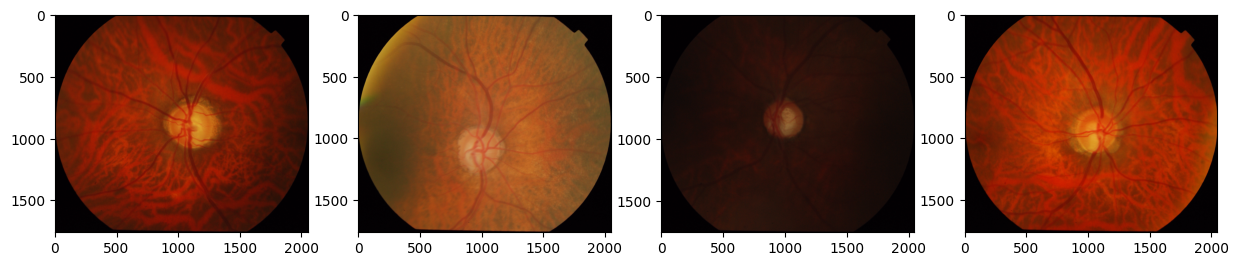


Sample Dristhi normal images:


<ipython-input-6-567d2ce37237>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


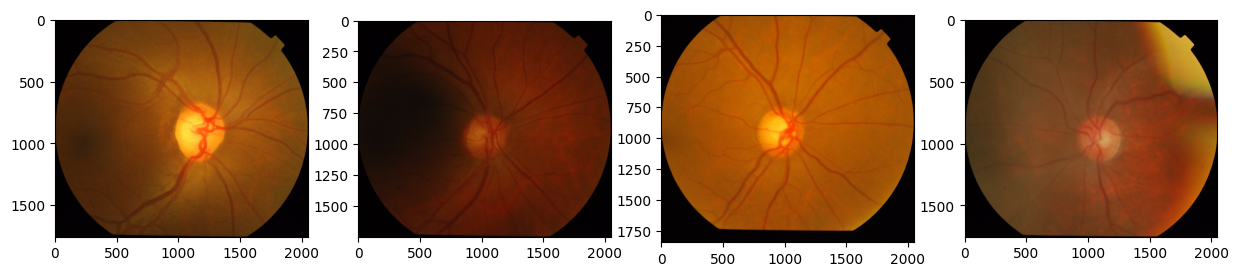

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

# 1.2 Rim-One

>The RIM-ONE DL image dataset consists of 313 retinographies from normal subjects and 172 retinographies from patients with glaucoma. These images were captured in three Spanish hospitals: Hospital Universitario de Canarias (HUC), in Tenerife, Hospital Universitario Miguel Servet (HUMS), in Zaragoza, and Hospital Clínico Universitario San Carlos (HCSC), in Madrid.

>This dataset has been divided into training and test sets, with two variants:
* Partitioned randomly: the training and test sets are built randomly from all the images of the dataset.
* Partitioned by hospital: the images taken in the HUC are used for the training set, while the images taken in the HUMS and HCSC are used for testing.

In [ ]:
rimOne_dir = '/content/drive/MyDrive/Glaucoma Datasets/RIM-ONE_DL_images/RIM-ONE_DL_images/partitioned_randomly/'
train_glaucoma_dir = rimOne_dir + "training_set/glaucoma"
train_normal_dir = rimOne_dir + "training_set/normal"
test_glaucoma_dir = rimOne_dir + "test_set/glaucoma"
test_normal_dir = rimOne_dir + "test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")


Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


<ipython-input-8-5215e82255ff>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


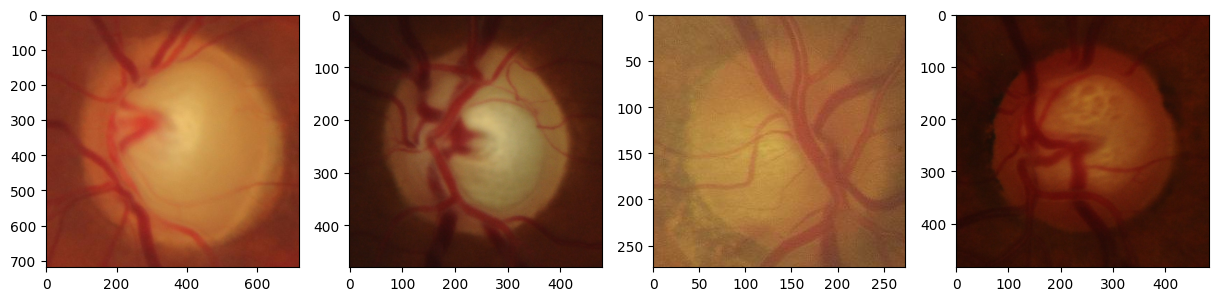


Sample Rim-One normal images:


<ipython-input-8-5215e82255ff>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i)


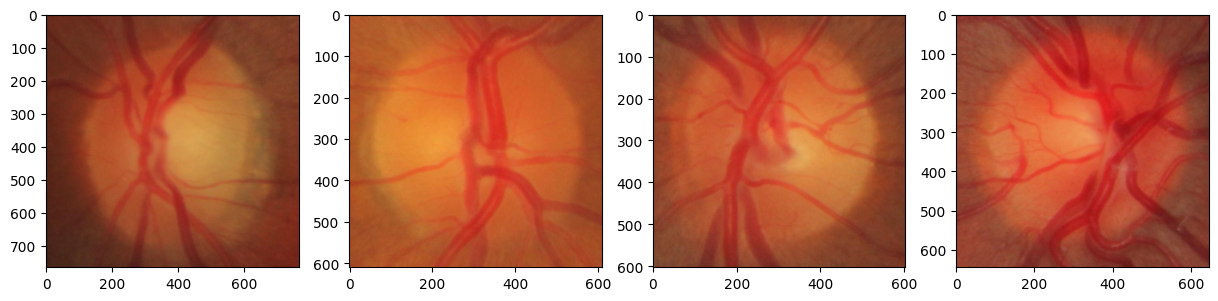

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

# 1.3. ACRIMA dataset
* Country: Spain
* No. of patients: unknown
* No. of images: 705
* Diseases present: Glaucoma and healthy eyes
* Instrument used: TRC retina camera (Topcon, Japan)
* Image format: JPEG

>ACRIMA database is composed by 705 fundus images (396 glaucomatous and 309 normal images). They were collected at the FISABIO Oftalmología Médica in Valencia, Spain, from glaucomatous and normal patients with their previous consent and in accordance with the ethical standards laid down in the 1964 Declaration of Helsinki. All images from ACRIMA database were annotated by glaucoma experts with several years of experience. They were cropped around the optic disc and renamed.



>The image name has the following structure: First, the name starts with the two letters "Im", followed by an image number composed by three digits (starting from 001 until 705), followed by the label (this label is "g" if the image is pathological and "_" if the image is normal). Finally, all image names have the database name, "ACRIMA", at the end of their names. For example, a name for a glaucomatous image is "Im686_g_ACRIMA" and "Im001_ACRIMA" for a normal image.

In [ ]:
# acrima_dir = "/content/drive/MyDrive/Glaucoma Datasets/Database/Database/Images"
# acrima_main_dir = '/content/drive/MyDrive/Glaucoma Datasets/Database/Database'

In [ ]:
# os.makedirs(acrima_main_dir + '/glaucoma')
# os.makedirs(acrima_main_dir + '/normal')

In [ ]:
# for f in os.listdir(acrima_dir):
#   if 'g' in (f.split('.')[0]):
#     file_path = os.path.join(acrima_dir,f)
#     img = cv2.imread(file_path)
#     cv2.imwrite('/content/drive/MyDrive/Glaucoma Datasets/Database/Database/glaucoma/' + f, img)
#   else:
#     file_path = os.path.join(acrima_dir,f)
#     img = cv2.imread(file_path)
#     cv2.imwrite('/content/drive/MyDrive/Glaucoma Datasets/Database/Database/normal/' + f, img)



In [ ]:
# acrima_dir = current_dir + "/drive/MyDrive/datasets/acrima/Database"
glaucoma_dir = "/content/drive/MyDrive/Glaucoma Datasets/Database/Database/glaucoma"
normal_dir = "/content/drive/MyDrive/Glaucoma Datasets/Database/Database/normal"

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	397 images representing an eye with glaucoma
	309 images representing a normal eye


In [ ]:
# print("Sample glaucoma images:")
# plt.subplots(figsize=(15, 10))
# for i in range(1, 5):
#     plt.subplot(1, 4, i)
#     plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
# plt.show()

# print("\nSample normal images:")
# plt.subplots(figsize=(15, 10))
# for i in range(1, 5):
#     plt.subplot(1, 4, i)
#     plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
# plt.show()

Combining datasets

In [ ]:
## define your paths for glaucoma####
# g_path1 = '/content/drive/MyDrive/Glaucoma Datasets/archive/Test-20211018T060000Z-001/Test/Images/glaucoma'
# g_path2 = '/content/drive/MyDrive/Glaucoma Datasets/Database/Database/glaucoma'
# g_path3 ='/content/drive/MyDrive/Glaucoma Datasets/RIM-ONE_DL_images/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
# g_path4='/content/drive/MyDrive/Glaucoma Datasets/RIM-ONE_DL_images/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
# g_path5='/content/drive/MyDrive/Glaucoma Datasets/archive/Training-20211018T055246Z-001/Training/Images/GLAUCOMA'
# g_dest='/content/drive/MyDrive/Glaucoma Datasets/combined/glaucoma'

# os.makedirs(g_dest)
# g_list=[g_path1,g_path2,g_path3,g_path4,g_path5]

# for i in g_list:
#   shutil.copytree(i, g_dest, dirs_exist_ok=True)

##################################################
#normal
# n_path1='/content/drive/MyDrive/Glaucoma Datasets/Database/Database/normal'
# n_path2='/content/drive/MyDrive/Glaucoma Datasets/RIM-ONE_DL_images/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
# n_path3='/content/drive/MyDrive/Glaucoma Datasets/RIM-ONE_DL_images/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
# n_path4='/content/drive/MyDrive/Glaucoma Datasets/archive/Training-20211018T055246Z-001/Training/Images/NORMAL'
# n_path5='/content/drive/MyDrive/Glaucoma Datasets/archive/Test-20211018T060000Z-001/Test/Images/normal'
# n_dest='/content/drive/MyDrive/Glaucoma Datasets/combined/normal'
# os.makedirs(n_dest)
# n_list=[n_path1,n_path2,n_path3,n_path4,n_path5]

# for i in n_list:
#   shutil.copytree(i,n_dest, dirs_exist_ok=True)
# print(len(os.listdir(n_dest)))

# Combined

In [ ]:
pip install pathlib

In [ ]:
import pathlib

Total images: 1289
Total number of classes: 2
Total glaucoma images: 639
Total normal images: 653


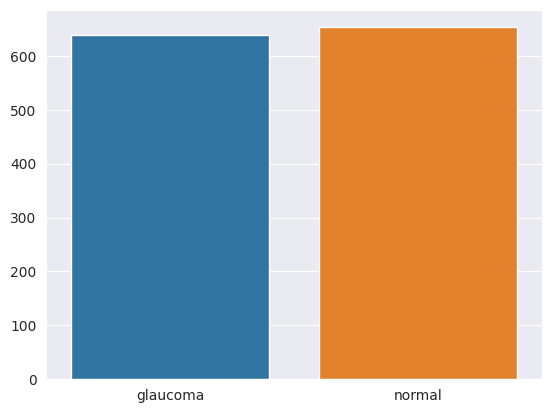

In [ ]:
base_dir = '/content/drive/MyDrive/Glaucoma Datasets/combined'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma Datasets/combined/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/Glaucoma Datasets/combined/normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

Spliiting Ratio of Dataset 80:10:10 (Train:Test:Validation)



In [ ]:
!pip install split-folders
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/Glaucoma Datasets/combined'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.8,.1,.1), group_prefix=None)

Copying files: 1291 files [00:26, 48.26 files/s] 


**Data augmentation done using Image Data Generator**

 The Keras ImageDataGenerator class is designed to provide real-time data augmentation. Meaning it is generating augmented images on the fly while your model is still in the training stage. That means it creates a pipeline, but does not create augmented images directly.

ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in fact, the case, then the model would be seeing the original images multiple times which would definitely overfit our model.

Link : https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


In [ ]:
# len(train_ds.classes)

### Important functions

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# plot_train_history(model_info)

In [ ]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

## CNN MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

# Initialising the CNN
classifier = Sequential()
# Step 1 - Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Step 2 - Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               6

In [ ]:
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 150,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/150
32/32 [==============================] - 102s 2s/step - loss: 1.3432 - accuracy: 0.4600 - val_loss: 1.3530 - val_accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 35s 1s/step - loss: 1.2963 - accuracy: 0.4200 - val_loss: 1.9068 - val_accuracy: 0.5000
Epoch 3/150
32/32 [==============================] - 34s 1s/step - loss: 1.0734 - accuracy: 0.4750 - val_loss: 1.6251 - val_accuracy: 0.4922
Epoch 4/150
32/32 [==============================] - 35s 1s/step - loss: 0.9312 - accuracy: 0.5440 - val_loss: 2.9624 - val_accuracy: 0.5078
Epoch 5/150
32/32 [==============================] - 34s 1s/step - loss: 0.8596 - accuracy: 0.5340 - val_loss: 1.2002 - val_accuracy: 0.5078
Epoch 6/150
32/32 [==============================] - 33s 1s/step - loss: 0.7892 - accuracy: 0.5800 - val_loss: 1.5419 - val_accuracy: 0.4922
Epoch 7/150
32/32 [==============================] - 34s 1s/step - loss: 0.7846 - accuracy: 0.5498 - val_loss: 1.0750 - val_accuracy: 0.4766
Epoch 8/150


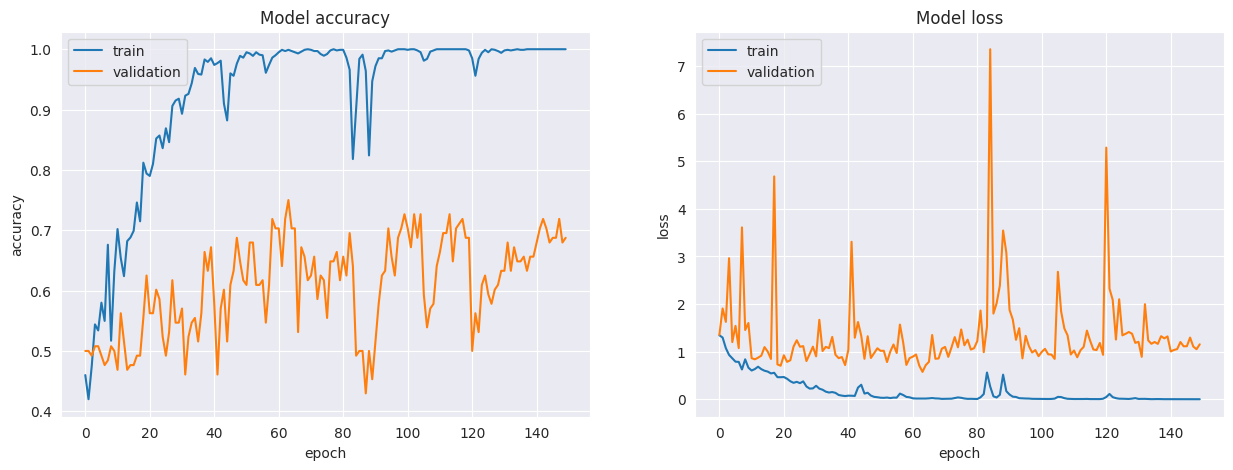

In [ ]:
plot_train_history(model_info)

In [ ]:
classifier.save('/content/drive/MyDrive/Glaucoma Datasets/combined/combine_cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading Model

In [ ]:
model=load_model('/content/drive/MyDrive/Glaucoma Datasets/combined/combine_cnn.h5')
print("Glaucoma detection model loaded")

In [ ]:
# test_image = load_img('/content/drive/MyDrive/datasets/acrima/Database/glaucoma/Im310_g_ACRIMA.jpg', target_size = (256,256))
# prediction = glaucoma_prediction(test_image)
# if prediction == 0:
#  print("Glaucoma")
# else:
#  print("Not Glaucoma")

In [ ]:
# test_image = load_img('/content/drive/MyDrive//datasets/acrima/Database/normal/Im001_ACRIMA.jpg', target_size = (256,256))
# prediction = glaucoma_prediction(test_image)
# if prediction == 0:
#  print("Glaucoma")
# else:
#  print("Not Glaucoma")

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 6s 1s/step - loss: 1.3733 - accuracy: 0.6183
Loss: 1.3733222484588623 Accuracy: 0.6183205842971802


Testing set confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

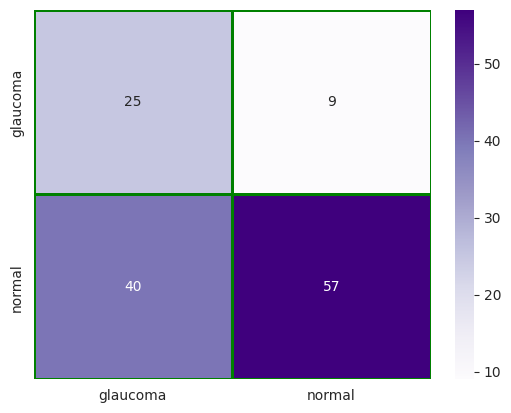

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.735294,0.384615,0.505051,65.000000
normal,0.587629,0.863636,0.699387,66.000000
accuracy,0.625954,0.625954,0.625954,0.625954
macro avg,0.661461,0.624126,0.602219,131.000000
weighted avg,0.660898,0.625954,0.602960,131.000000


,precision,recall,f1-score,support
glaucoma,0.735294,0.384615,0.505051,65.000000
normal,0.587629,0.863636,0.699387,66.000000
accuracy,0.625954,0.625954,0.625954,0.625954
macro avg,0.661461,0.624126,0.602219,131.000000
weighted avg,0.660898,0.625954,0.602960,131.000000


## InceptionV3

In [ ]:
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

keras.backend.clear_session()

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
inception = Sequential()
inception.add(base_model)
inception.add(GlobalAveragePooling2D())
inception.add(Dense(512, activation='relu'))
inception.add(BatchNormalization())
inception.add(Dense(256, activation='relu'))
inception.add(Dropout(0.25))
inception.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in inception.layers[0].layers:
    layer.trainable = False

# Compile the model
inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model with the callback

history = inception.fit(train_ds, epochs=50,steps_per_epoch = int(round(1032/32)),
 validation_data=val_ds,validation_steps = int(round(128/32)), callbacks=[checkpoint])

# Load the best weights
inception.load_weights('best_weights.h5')

# Summary of the model
inception.summary()

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.1046 - accuracy: 0.4680
Epoch 1: val_loss improved from inf to 0.87721, saving model to best_weights.h5
32/32 [==============================] - 67s 1s/step - loss: 1.1046 - accuracy: 0.4680 - val_loss: 0.8772 - val_accuracy: 0.4609
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.5391 - accuracy: 0.7270
Epoch 2: val_loss did not improve from 0.87721
32/32 [==============================] - 41s 1s/step - loss: 0.5391 - accuracy: 0.7270 - val_loss: 1.6044 - val_accuracy: 0.5000
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7550
Epoch 3: val_loss did not improve from 0.87721
32/32 [==============================] - 34s 1s/step - loss: 0.5248 - accuracy: 0.7550 - val_loss: 0.8789 - val_accuracy: 0.5156
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0.808

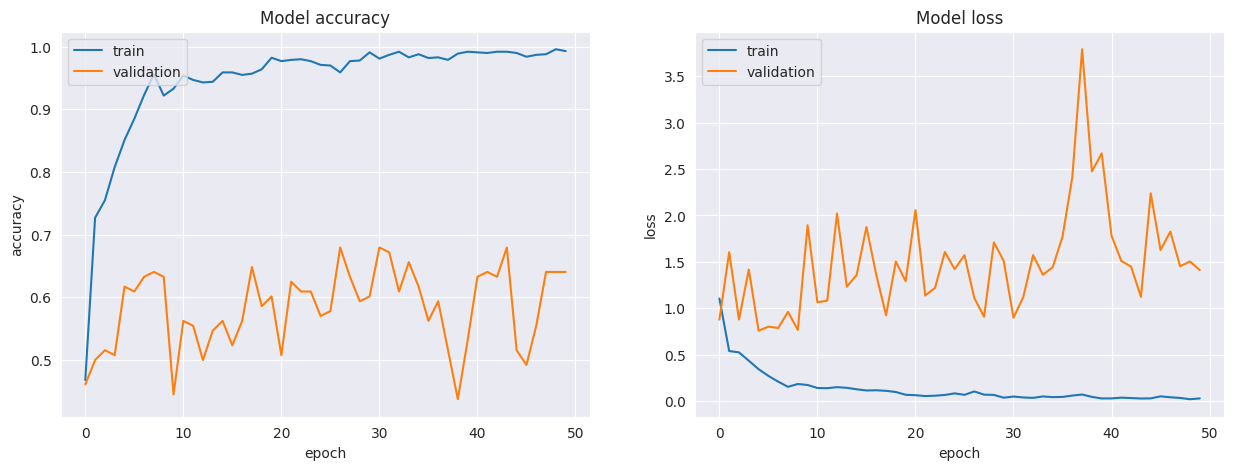

In [ ]:
plot_train_history(history)

In [ ]:
# score=model.evaluate(test_ds)
# print("Loss:",score[0],"Accuracy:",score[1])

In [ ]:
pred= np.round(inception.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 5s 922ms/step
[[38 22]
 [27 44]]


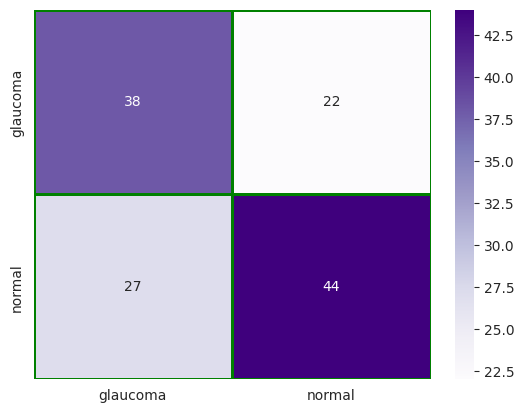

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.633333,0.584615,0.608000,65.000000
normal,0.619718,0.666667,0.642336,66.000000
accuracy,0.625954,0.625954,0.625954,0.625954
macro avg,0.626526,0.625641,0.625168,131.000000
weighted avg,0.626474,0.625954,0.625299,131.000000


## Resnet50

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights_resnet50.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, Add
from keras.applications import ResNet50

keras.backend.clear_session()
# Load pre-trained ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

# Create the final model
resnet50_model = Model(inputs=base_model.input, outputs=predictions)

# Set the first layers to non-trainable (optional)

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
resnet50_model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
resnet50_model_info=resnet50_model.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 50,
validation_data = val_ds,
validation_steps = int(round(128/32)),
                                       callbacks = [checkpoint])

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.0552 - accuracy: 0.5360
Epoch 1: val_accuracy improved from -inf to 0.50781, saving model to best_weights_resnet50.h5
32/32 [==============================] - 77s 1s/step - loss: 1.0552 - accuracy: 0.5360 - val_loss: 3437595.5000 - val_accuracy: 0.5078
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.8630 - accuracy: 0.5310
Epoch 2: val_accuracy did not improve from 0.50781
32/32 [==============================] - 39s 1s/step - loss: 0.8630 - accuracy: 0.5310 - val_loss: 130697.7188 - val_accuracy: 0.5078
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.9192 - accuracy: 0.4890
Epoch 3: val_accuracy did not improve from 0.50781
32/32 [==============================] - 39s 1s/step - loss: 0.9192 - accuracy: 0.4890 - val_loss: 0.7124 - val_accuracy: 0.5078
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.9200 - accuracy: 0.4330
Epoch 4: val_accuracy did not 

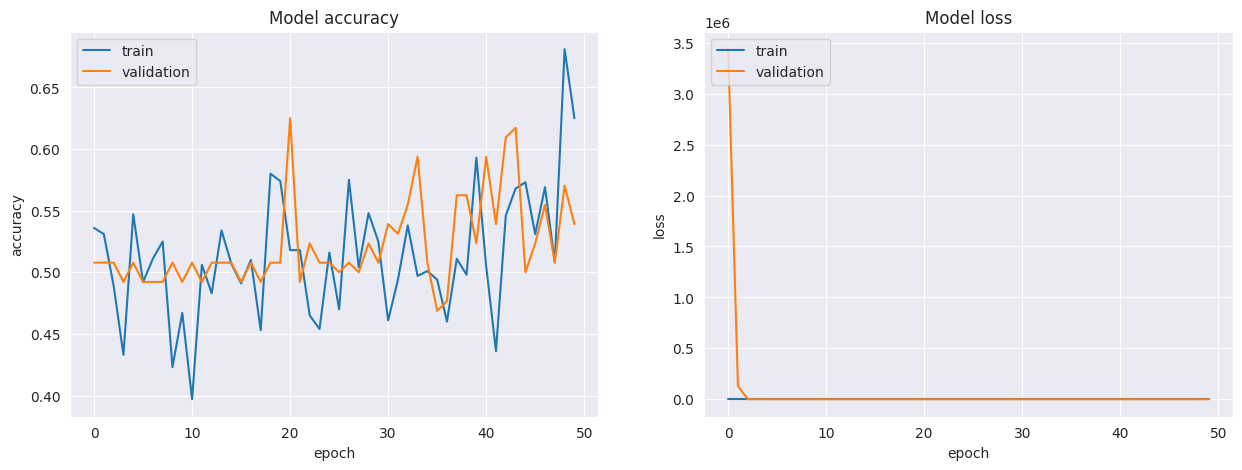

In [ ]:
plot_train_history(resnet50_model_info)

In [ ]:
score=resnet50_model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 11s 2s/step - loss: 5.8693 - accuracy: 0.4351
Loss: 5.86934232711792 Accuracy: 0.4351145029067993


In [ ]:
resnet_pred= np.round(resnet50_model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 11s 2s/step
[[38 22]
 [27 44]]


In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'])
print(test_report)

              precision    recall  f1-score   support

    glaucoma       0.64      0.54      0.58        65
      normal       0.61      0.70      0.65        66

    accuracy                           0.62       131
   macro avg       0.62      0.62      0.62       131
weighted avg       0.62      0.62      0.62       131



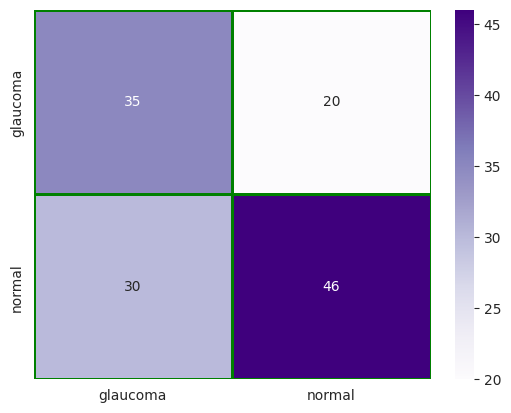

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

## Concatenating resnet50 and inceptionv2

In [ ]:
# pred + resnet50_model

In [ ]:
merged_pred = (pred + resnet_pred)/2

In [ ]:
# np.argmax(merged_pred,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
test_labels=test_ds.labels
test_pred_labels=np.argmax(merged_pred, axis = 1)
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print(conf_matrix)

[[47 53]
 [18 13]]


In [ ]:
test_report = classification_report(test_labels,test_pred_labels, target_names=['glaucoma','normal'])
print(test_report)

              precision    recall  f1-score   support

    glaucoma       0.47      0.72      0.57        65
      normal       0.42      0.20      0.27        66

    accuracy                           0.46       131
   macro avg       0.44      0.46      0.42       131
weighted avg       0.44      0.46      0.42       131



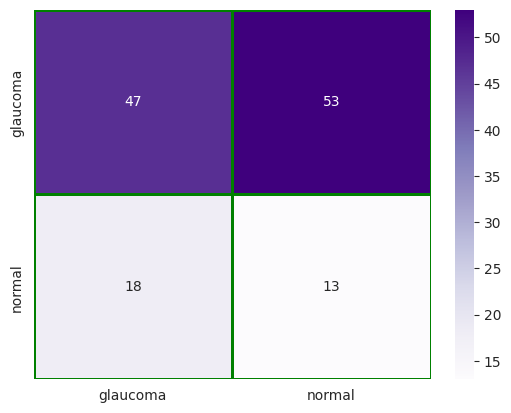

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

## mobilenetv2

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_weights_mobilenetv2.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:

from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
keras.backend.clear_session()
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
mobilenet = Sequential()
mobilenet.add(base_model)
mobilenet.add(GlobalAveragePooling2D())
mobilenet.add(Dense(512, activation='relu'))
mobilenet.add(BatchNormalization())
mobilenet.add(Dense(256, activation='relu'))
mobilenet.add(Dropout(0.25))
mobilenet.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in mobilenet.layers[0].layers:
    mobilenet.trainable = False

# Compile the model
mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
mobilenet.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               1313

In [ ]:
mobilenet_v2_model_info=mobilenet.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 50,
validation_data = val_ds,
validation_steps = int(round(128/32)),
                                  callbacks = [checkpoint])

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.9928 - accuracy: 0.4920
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_weights_mobilenetv2.h5
32/32 [==============================] - 37s 1s/step - loss: 0.9928 - accuracy: 0.4920 - val_loss: 0.9214 - val_accuracy: 0.5000
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.9693 - accuracy: 0.4880
Epoch 2: val_accuracy improved from 0.50000 to 0.50781, saving model to best_weights_mobilenetv2.h5
32/32 [==============================] - 33s 1s/step - loss: 0.9693 - accuracy: 0.4880 - val_loss: 0.9225 - val_accuracy: 0.5078
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.9775 - accuracy: 0.4900
Epoch 3: val_accuracy did not improve from 0.50781
32/32 [==============================] - 33s 1s/step - loss: 0.9775 - accuracy: 0.4900 - val_loss: 0.9149 - val_accuracy: 0.5078
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.9164 - accura

In [ ]:
score=mobilenet.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 4s 761ms/step - loss: 0.9245 - accuracy: 0.5115
Loss: 0.9244722723960876 Accuracy: 0.5114504098892212


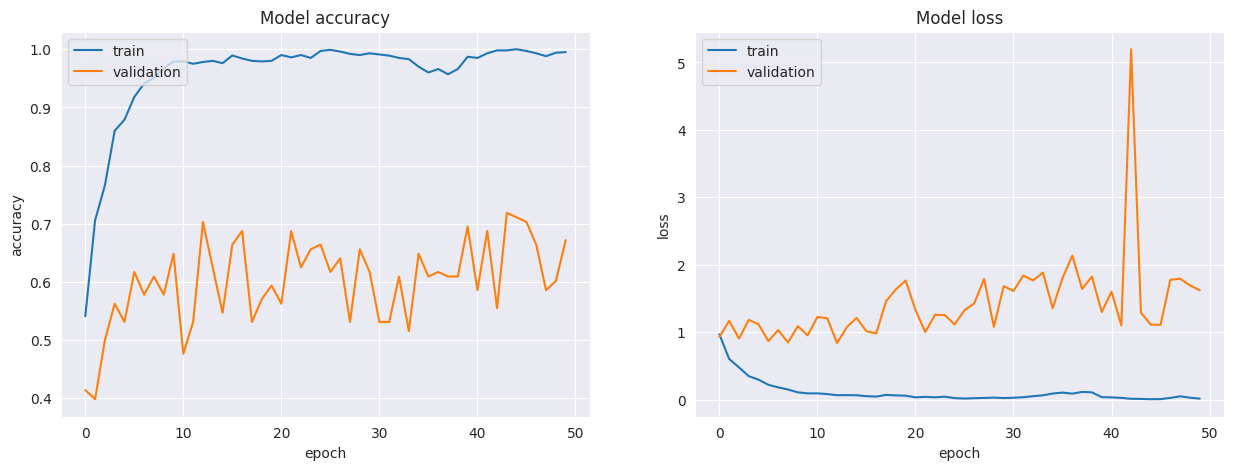

In [ ]:
plot_train_history(mobilenet_v2_model_info)

In [ ]:
pred= np.round(mobilenet.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 4s 714ms/step
[[39 21]
 [26 45]]


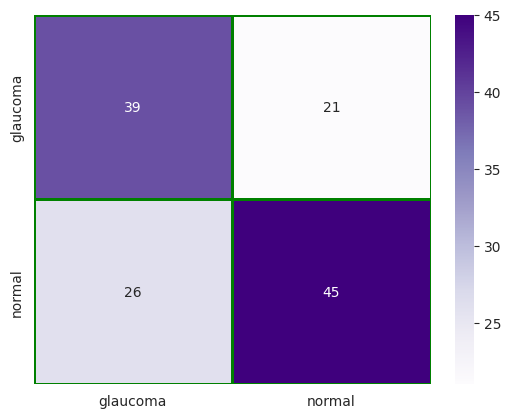

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'])
print(test_report)

              precision    recall  f1-score   support

    glaucoma       0.65      0.60      0.62        65
      normal       0.63      0.68      0.66        66

    accuracy                           0.64       131
   macro avg       0.64      0.64      0.64       131
weighted avg       0.64      0.64      0.64       131



In [ ]:
from keras.models import Model
from keras.layers import Concatenate

# Rename layers in the first model
for layer in inception.layers:
    layer._name = f"inception_{layer.name}"

# Rename layers in the second model
for layer in mobilenet.layers:
    layer._name = f"mobilenet_{layer.name}"

# Get the output tensors of the two models
output_model1 = inception.layers[-1].output
output_model2 = mobilenet.layers[-1].output

# Concatenate the outputs
merged = Concatenate()([output_model1, output_model2])

# Create a new model with the concatenated outputs
final_model = Model(inputs=[inception.input, mobilenet.input], outputs=merged)

# Compile the final model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the final model
final_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inception_v3_input (InputL  [(None, 256, 256, 3)]        0         []                            
 ayer)                                                                                            
                                                                                                  
 mobilenetv2_1.00_224_input  [(None, 256, 256, 3)]        0         []                            
  (InputLayer)                                                                                    
                                                                                                  
 inception_inception_v3 (Fu  (None, 6, 6, 2048)           2180278   ['inception_v3_input[0][0]']  
 nctional)                                                4                                 

In [ ]:
final_checkpoint = ModelCheckpoint('final_best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

final_model.fit(train_ds, epochs=50, steps_per_epoch=int(round(1032/32)),
                validation_data=val_ds, validation_steps=int(round(128/32)), callbacks=[final_checkpoint])

# Load the best weights for the final model
final_model.load_weights('final_best_weights.h5')

Epoch 1/50


ValueError: ignored

In [ ]:
from keras.layers import Concatenate, Input
from keras.models import Model

# Assuming you have trained models 'mobilenet' and 'inception'

# Rename layers in the mobilenet model
for layer in mobilenet.layers:
    layer._name = f"mobilenet_{layer.name}"

# Rename layers in the inception model
for layer in inception.layers:
    layer._name = f"inception_{layer.name}"

# Create separate instances of Sequential models
mobilenet_input = Input(shape=(256, 256, 3), name='mobilenet_input')
inception_input = Input(shape=(256, 256, 3), name='inception_input')

# Create a functional model for mobilenet
mobilenet_output = mobilenet(mobilenet_input)

# Create a functional model for inception
inception_output = inception(inception_input)

# Concatenate the outputs
merged = Concatenate()([mobilenet_output, inception_output])

# Create a new model with the concatenated outputs
print(merged)

KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='concatenate_6/concat:0', description="created by layer 'concatenate_6'")


## VGG16

In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

keras.backend.clear_session()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)



58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# mobilenet_v2_model_info=model.fit(train_ds,
# steps_per_epoch = int(round(1032/32)),
# epochs = 50,
# validation_data = val_ds,
# validation_steps = int(round(128/32)))

vgg16_model_info = model.fit(train_ds, epochs=50,steps_per_epoch = int(round(1032/32)),
 validation_data=val_ds,validation_steps = int(round(128/32)), callbacks=[checkpoint])

# Load the best weights
model.load_weights('best_weights.h5')

# Summary of the model
model.summary()

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.9106 - accuracy: 0.5590
Epoch 1: val_loss improved from inf to 0.71505, saving model to best_weights.h5
32/32 [==============================] - 43s 1s/step - loss: 0.9106 - accuracy: 0.5590 - val_loss: 0.7150 - val_accuracy: 0.4922
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.7752 - accuracy: 0.5640
Epoch 2: val_loss improved from 0.71505 to 0.71100, saving model to best_weights.h5
32/32 [==============================] - 33s 1s/step - loss: 0.7752 - accuracy: 0.5640 - val_loss: 0.7110 - val_accuracy: 0.4766
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.7207 - accuracy: 0.6080
Epoch 3: val_loss did not improve from 0.71100
32/32 [==============================] - 35s 1s/step - loss: 0.7207 - accuracy: 0.6080 - val_loss: 0.7189 - val_accuracy: 0.4922
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.6882 - accuracy: 0.6040
Epoch 4: val_loss improved

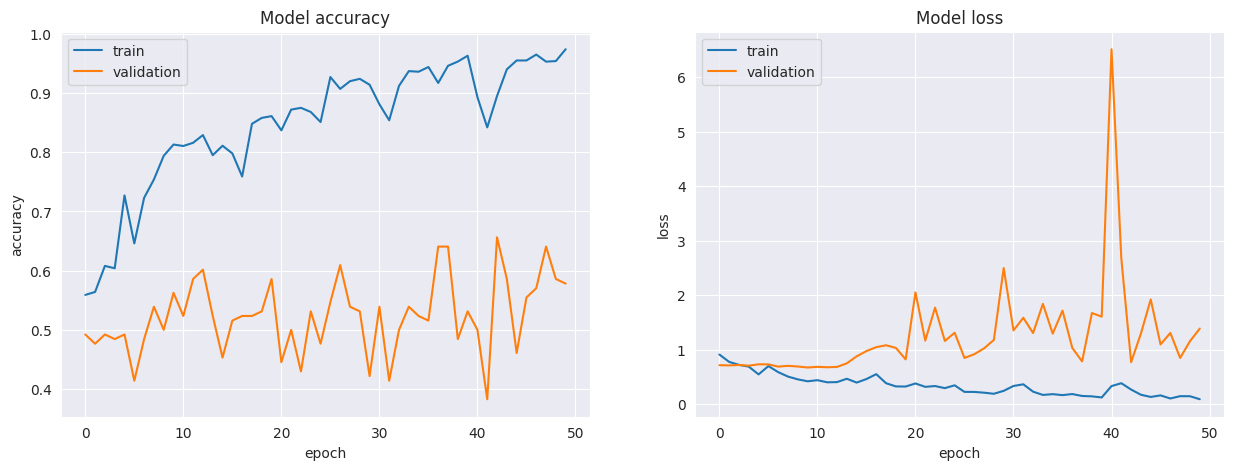

In [ ]:
plot_train_history(vgg16_model_info)

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 6s 1s/step
[[11  2]
 [54 64]]


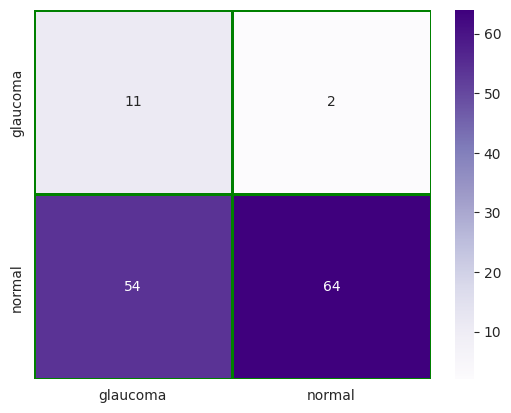

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 4s 858ms/step - loss: 0.6919 - accuracy: 0.5573
Loss: 0.6919192671775818 Accuracy: 0.5572519302368164


In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'])
print(test_report)

              precision    recall  f1-score   support

    glaucoma       0.85      0.17      0.28        65
      normal       0.54      0.97      0.70        66

    accuracy                           0.57       131
   macro avg       0.69      0.57      0.49       131
weighted avg       0.69      0.57      0.49       131



## InceptionV3

In [ ]:
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint

keras.backend.clear_session()

# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Add custom top layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# Set the first layers to non-trainable (optional)
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model with the callback

inception = model.fit(train_ds, epochs=50,steps_per_epoch = int(round(1032/32)),
 validation_data=val_ds,validation_steps = int(round(128/32)), callbacks=[checkpoint])

# Load the best weights
model.load_weights('best_weights.h5')

# Summary of the model
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.9777 - accuracy: 0.5110
Epoch 1: val_loss improved from inf to 1.14359, saving model to best_weights.h5
32/32 [==============================] - 44s 1s/step - loss: 0.9777 - accuracy: 0.5110 - val_loss: 1.1436 - val_accuracy: 0.4922
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.6606 - accuracy: 0.6690
Epoch 2: val_loss improved from 1.14359 to 0.72824, saving model to best_weights.h5
32/32 [==============================] - 32s 1s/step - loss: 0.6606 - accuracy: 0.6690 - val_loss: 0.7282 - val_accuracy: 0.5625
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8090
Epoch 3: val_loss did not improve from 0.72824
32/32 [==============================] - 33s 1s/step - loss: 0.4075 - accuracy: 0.8090 - val_loss: 0.8021 - val_accuracy: 0.5234
Epoch 4/50
32/32 [==============================] - ETA

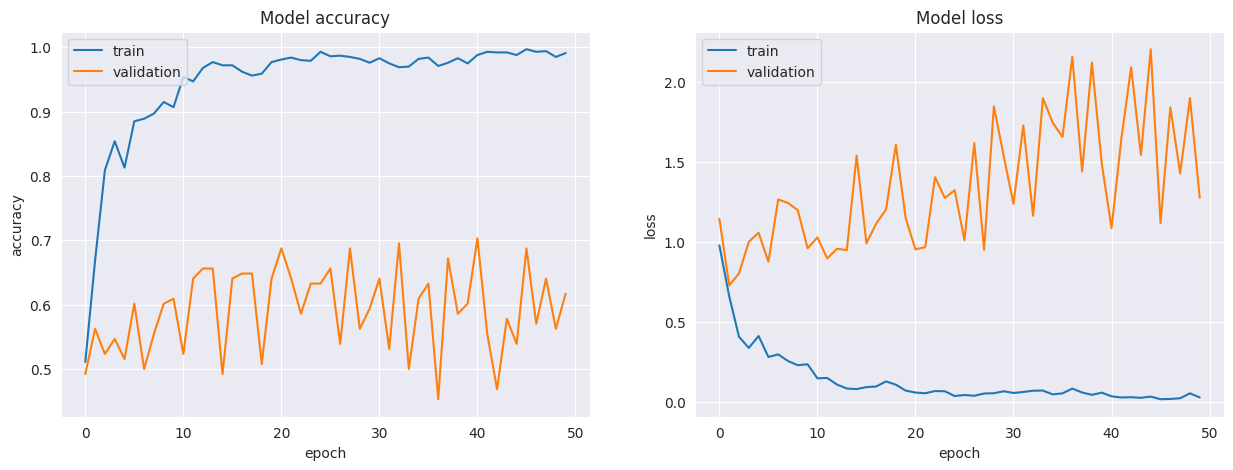

In [ ]:
plot_train_history(inception)

In [ ]:
# score=model.evaluate(test_ds)
# print("Loss:",score[0],"Accuracy:",score[1])

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 7s 1s/step
[[50 21]
 [15 45]]


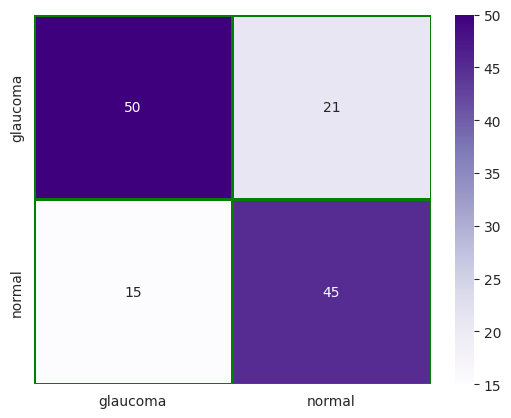

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.704225,0.769231,0.735294,65.000000
normal,0.750000,0.681818,0.714286,66.000000
accuracy,0.725191,0.725191,0.725191,0.725191
macro avg,0.727113,0.725524,0.724790,131.000000
weighted avg,0.727287,0.725191,0.724710,131.000000
